### Data Loading

sumber data:
https://www.kaggle.com/datasets/gabrielramos87/iowa-sales-liquor-jan-2021jan-2022/data

In [1]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Dataset di load
file_ori = "Iowa Liquor Sales (Jan 2021-Jan 2022).csv"  # File path
df_ori = pd.read_csv(file_ori)
df_ori

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-33179700135,2021-01-04,2576,Hy-Vee Wine and Spirits / Storm Lake,1250 N Lake St,Storm Lake,50588.0,POINT (-95.200758 42.65318400000001),11.0,BUENA VIST,...,64870,Fireball Cinnamon Whiskey,48,100,0.90,1.35,48,64.80,4.80,1.26
1,INV-33196200106,2021-01-04,2649,Hy-Vee #3 / Dubuque,400 Locust St,Dubuque,52001.0,POINT (-90.666497 42.49721900000001),31.0,DUBUQUE,...,65200,Tequila Rose Liqueur,12,750,11.50,17.25,4,69.00,3.00,0.79
2,INV-33184300011,2021-01-04,2539,Hy-Vee Food Store / Iowa Falls,640 S. Oak,Iowa Falls,50126.0,POINT (-93.262364 42.508752),42.0,HARDIN,...,38008,Smirnoff 80prf PET,6,1750,14.75,22.13,6,132.78,10.50,2.77
3,INV-33184100015,2021-01-04,4024,Wal-Mart 1546 / Iowa Falls,840 S Oak,Iowa Falls,50126.0,POINT (-93.262446 42.503407),42.0,HARDIN,...,36648,Caliber Vodka,12,750,3.31,4.97,12,59.64,9.00,2.37
4,INV-33174200025,2021-01-04,5385,Vine Food & Liquor,2704 Vine St.,West Des Moines,50265.0,POINT (-93.741511 41.580206),77.0,POLK,...,4626,Buchanan Deluxe 12YR,12,750,20.99,31.49,2,62.98,1.50,0.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805302,INV-41968600007,2021-11-14,4617,Lickety Liquor,2501 HUBBELL AVE,Des Moines,50317.0,POINT (-93.570489 41.607817),77.0,POLK,...,87937,Juarez Silver,12,1000,7.83,11.75,1,11.75,1.00,0.26
2805303,INV-41968600008,2021-11-14,4617,Lickety Liquor,2501 HUBBELL AVE,Des Moines,50317.0,POINT (-93.570489 41.607817),77.0,POLK,...,89387,Juarez Gold,12,1000,7.83,11.75,1,11.75,1.00,0.26
2805304,INV-41968600009,2021-11-14,4617,Lickety Liquor,2501 HUBBELL AVE,Des Moines,50317.0,POINT (-93.570489 41.607817),77.0,POLK,...,39492,New Amsterdam Pink Whitney,12,750,7.50,11.25,3,33.75,2.25,0.59
2805305,INV-41968600006,2021-11-14,4617,Lickety Liquor,2501 HUBBELL AVE,Des Moines,50317.0,POINT (-93.570489 41.607817),77.0,POLK,...,89836,Hornitos Reposado,12,750,13.50,20.25,2,40.50,1.50,0.39


In [60]:
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805307 entries, 0 to 2805306
Data columns (total 24 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   invoice_and_item_number  object 
 1   date                     object 
 2   store_number             int64  
 3   store_name               object 
 4   address                  object 
 5   city                     object 
 6   zip_code                 float64
 7   store_location           object 
 8   county_number            float64
 9   county                   object 
 10  category                 float64
 11  category_name            object 
 12  vendor_number            float64
 13  vendor_name              object 
 14  item_number              int64  
 15  item_description         object 
 16  pack                     int64  
 17  bottle_volume_ml         int64  
 18  state_bottle_cost        float64
 19  state_bottle_retail      float64
 20  bottles_sold             int64  
 21  sale_dol

Dataset ini memiliki 2,8jt entries, dan memakan sekitar 600MB memory, sehingga memerlukan waktu agar semua entries dapat ter-load.

In [61]:
# Mengubah tipe data kolom "date" dari object menjadi date
df_ori["date"] = pd.to_datetime(df_ori["date"])
df_ori.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805307 entries, 0 to 2805306
Data columns (total 24 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   invoice_and_item_number  object        
 1   date                     datetime64[ns]
 2   store_number             int64         
 3   store_name               object        
 4   address                  object        
 5   city                     object        
 6   zip_code                 float64       
 7   store_location           object        
 8   county_number            float64       
 9   county                   object        
 10  category                 float64       
 11  category_name            object        
 12  vendor_number            float64       
 13  vendor_name              object        
 14  item_number              int64         
 15  item_description         object        
 16  pack                     int64         
 17  bottle_volume_ml         in

Untuk memudahkan proses filter, kolom date di ubah format dtypenya dari object menjadi datetime

In [62]:
# Hanya mengambil data dari bulan Januari tahun 2022
df_januari = df_ori[(df_ori["date"] >= "2022-01-01") & (df_ori["date"] < "2022-02-01")]

df_januari

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
1607939,INV-43468400011,2022-01-02,2536,HY-VEE / PLEASANT HILL,4815 Maple Drive,Pleasant Hill,50317.0,POINT (-93.519491 41.598133),77.0,Polk,...,25616,Seagrams 7 Crown PET Flask,12,750,7.50,11.25,12,135.00,9.00,2.37
1607940,INV-43468400005,2022-01-02,2536,HY-VEE / PLEASANT HILL,4815 Maple Drive,Pleasant Hill,50317.0,POINT (-93.519491 41.598133),77.0,Polk,...,39492,New Amsterdam Pink Whitney,12,750,7.50,11.25,12,135.00,9.00,2.37
1607941,INV-43468500029,2022-01-02,2190,"Central City Liquor, Inc.",1460 2ND AVE,Des Moines,50314.0,POINT (-93.619788 41.605706),77.0,POLK,...,28043,Jim Beam Vanilla,12,750,11.00,16.50,1,16.50,0.75,0.19
1607942,INV-43468400016,2022-01-02,2536,HY-VEE / PLEASANT HILL,4815 Maple Drive,Pleasant Hill,50317.0,POINT (-93.519491 41.598133),77.0,Polk,...,45888,Sailor Jerry Spiced Navy Rum,6,1750,19.25,28.88,6,173.28,10.50,2.77
1607943,INV-43468500009,2022-01-02,2190,"Central City Liquor, Inc.",1460 2ND AVE,Des Moines,50314.0,POINT (-93.619788 41.605706),77.0,POLK,...,10807,Crown Royal Regal Apple,12,750,16.59,24.89,12,298.68,9.00,2.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2483614,INV-44285400003,2022-01-31,3841,Hartig Drug Company #2 / Locust,157 Locust St,Dubuque,52001.0,POINT (-90.665439 42.495308),31.0,DUBUQUE,...,43028,Admiral Nelson Spiced,6,1750,11.55,17.33,2,34.66,3.50,0.92
2483615,INV-44258300038,2022-01-31,5092,Kum & Go #3035 / West Des Moines,7265 Vista Dr,West Des Moines,50265.0,POINT (-93.80783900000002 41.589057),77.0,POLK,...,36965,New Amsterdam 80prf Mini,10,50,5.54,8.31,4,33.24,0.20,0.05
2483616,INV-44266100010,2022-01-31,4250,Fareway Stores #882 / Eldora,1232 14th St,Eldora,50627.0,POINT (-93.10077 42.361055),42.0,HARDIN,...,58868,Jose Cuervo Authentic Strawberry Margarita,6,1750,8.74,13.11,6,78.66,10.50,2.77
2483617,INV-44277700015,2022-01-31,5071,Jeff's Market / Durant,408 6th Ave,Durant,52747.0,POINT (-90.911744 41.600606),16.0,CEDAR,...,15626,Jameson,12,750,16.99,25.49,2,50.98,1.50,0.39


Diambil entries hanya pada bulan Januari 2022, dari 2,8jt entries berkurang menjadi hanya 186rb entries saja.

In [ ]:
# Menyimpan data penjualan bulan Januari 2022
df_januari.to_csv("iowa_sales_jan_2022.csv", index=False)

Selanjutnya dataset yang telah dikurangi di-save dengan format .csv

### Data Cleaning

In [ ]:
# Load Dataset
df_jan = pd.read_csv("iowa_sales_jan_2022.csv") # Diberi nama variabel df_jan untuk memudahkan pengerjaan
df_jan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182595 entries, 0 to 182594
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   invoice_and_item_number  182595 non-null  object 
 1   date                     182595 non-null  object 
 2   store_number             182595 non-null  int64  
 3   store_name               182595 non-null  object 
 4   address                  182595 non-null  object 
 5   city                     182595 non-null  object 
 6   zip_code                 182595 non-null  float64
 7   store_location           163970 non-null  object 
 8   county_number            182595 non-null  float64
 9   county                   182595 non-null  object 
 10  category                 182595 non-null  float64
 11  category_name            182595 non-null  object 
 12  vendor_number            182595 non-null  float64
 13  vendor_name              182595 non-null  object 
 14  item

Dataset yang sebelumnya telah dikurangi entriesnya kemudian di load kembali untuk menjalani proses data cleaning.

In [ ]:
col = ['invoice_and_item_number','store_number','zip_code','county_number','vendor_number','vendor_name','volume_sold_liters','volume_sold_gallons'] # Kolom yang akan didrop
df_jan.drop(col,inplace=True,axis=1)
df_jan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182595 entries, 0 to 182594
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   date                 182595 non-null  object 
 1   store_name           182595 non-null  object 
 2   address              182595 non-null  object 
 3   city                 182595 non-null  object 
 4   store_location       163970 non-null  object 
 5   county               182595 non-null  object 
 6   category             182595 non-null  float64
 7   category_name        182595 non-null  object 
 8   item_number          182595 non-null  int64  
 9   item_description     182595 non-null  object 
 10  pack                 182595 non-null  int64  
 11  bottle_volume_ml     182595 non-null  int64  
 12  state_bottle_cost    182595 non-null  float64
 13  state_bottle_retail  182595 non-null  float64
 14  bottles_sold         182595 non-null  int64  
 15  sale_dollars     

Kolom yang tidak diperlukan kemudian di drop

In [ ]:
# Dataset dengan kolom yang telah didrop kemudian disimpan
df_jan.to_csv("iowa_sales_jan_2022_filtered.csv",index=False)

Dataset yang kolomnya sudah didrop kemudian disimpan dengan format file .csv, hal ini dilakukan untuk mempermudah proses cleaning selanjutnya.

In [ ]:
# Dataset diload kembali untuk mengececk keberadaan value Null atau Nan
df_clean = pd.read_csv("iowa_sales_jan_2022_filtered.csv") # Diberi nama variabel df_clean untuk memudahkan
df_clean.isna().sum()

date                       0
store_name                 0
address                    0
city                       0
store_location         18625
county                     0
category                   0
category_name              0
item_number                0
item_description           0
pack                       0
bottle_volume_ml           0
state_bottle_cost          0
state_bottle_retail        0
bottles_sold               0
sale_dollars               0
dtype: int64

Dataset diload dan kemudian dilakukan pengecekan value Null atau Nan. Ditemukan value Null atau Nan di kolom store_location.

In [ ]:
# Value Null atau Nan digantikan dengan string value 0
df_clean.fillna(value="0",inplace=True)
df_clean.isna().sum()

date                   0
store_name             0
address                0
city                   0
store_location         0
county                 0
category               0
category_name          0
item_number            0
item_description       0
pack                   0
bottle_volume_ml       0
state_bottle_cost      0
state_bottle_retail    0
bottles_sold           0
sale_dollars           0
dtype: int64

Value Null atau Nan kemudian diisikan dengan string value 0. Setelah itu dilakukan pengecekan kembali apakah masih ada kolom dengan value Null atau Nan.

In [81]:
df_clean.to_csv("iowa_sales_jan_2022_cleaned.csv",index=False)

Setelah dataset sudah di-cleaning, kemudian dataset disimpan dengan file format .csv

### Analisis dan Perhitungan

In [3]:
# Dataset di load
df = pd.read_csv("iowa_sales_jan_2022_cleaned.csv")
df

,date,store_name,address,city,store_location,county,category,category_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars
0,2022-01-02,HY-VEE / PLEASANT HILL,4815 Maple Drive,Pleasant Hill,POINT (-93.519491 41.598133),Polk,1011100.0,Blended Whiskies,25616,Seagrams 7 Crown PET Flask,12,750,7.50,11.25,12,135.00
1,2022-01-02,HY-VEE / PLEASANT HILL,4815 Maple Drive,Pleasant Hill,POINT (-93.519491 41.598133),Polk,1031200.0,American Flavored Vodka,39492,New Amsterdam Pink Whitney,12,750,7.50,11.25,12,135.00
2,2022-01-02,"Central City Liquor, Inc.",1460 2ND AVE,Des Moines,POINT (-93.619788 41.605706),POLK,1011200.0,Straight Bourbon Whiskies,28043,Jim Beam Vanilla,12,750,11.00,16.50,1,16.50
3,2022-01-02,HY-VEE / PLEASANT HILL,4815 Maple Drive,Pleasant Hill,POINT (-93.519491 41.598133),Polk,1062400.0,Spiced Rum,45888,Sailor Jerry Spiced Navy Rum,6,1750,19.25,28.88,6,173.28
4,2022-01-02,"Central City Liquor, Inc.",1460 2ND AVE,Des Moines,POINT (-93.619788 41.605706),POLK,1012100.0,Canadian Whiskies,10807,Crown Royal Regal Apple,12,750,16.59,24.89,12,298.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182590,2022-01-31,Hartig Drug Company #2 / Locust,157 Locust St,Dubuque,POINT (-90.665439 42.495308),DUBUQUE,1062400.0,Spiced Rum,43028,Admiral Nelson Spiced,6,1750,11.55,17.33,2,34.66
182591,2022-01-31,Kum & Go #3035 / West Des Moines,7265 Vista Dr,West Des Moines,POINT (-93.80783900000002 41.589057),POLK,1031100.0,American Vodkas,36965,New Amsterdam 80prf Mini,10,50,5.54,8.31,4,33.24
182592,2022-01-31,Fareway Stores #882 / Eldora,1232 14th St,Eldora,POINT (-93.10077 42.361055),HARDIN,1071100.0,Cocktails /RTD,58868,Jose Cuervo Authentic Strawberry Margarita,6,1750,8.74,13.11,6,78.66
182593,2022-01-31,Jeff's Market / Durant,408 6th Ave,Durant,POINT (-90.911744 41.600606),CEDAR,1012400.0,Irish Whiskies,15626,Jameson,12,750,16.99,25.49,2,50.98


Dataset yang telah selesai di-cleaning kemudian di load agar dapat dianalisis dan menjawab pertanyaan project.

1. Brand minuman apa yang menempati penjualan teratas pada bulan Januari 2022?

C:\Users\eldim\AppData\Local\Temp\ipykernel_6464\2597056907.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_grouped["item_description"], x=df_grouped["bottles_sold"], palette="coolwarm")


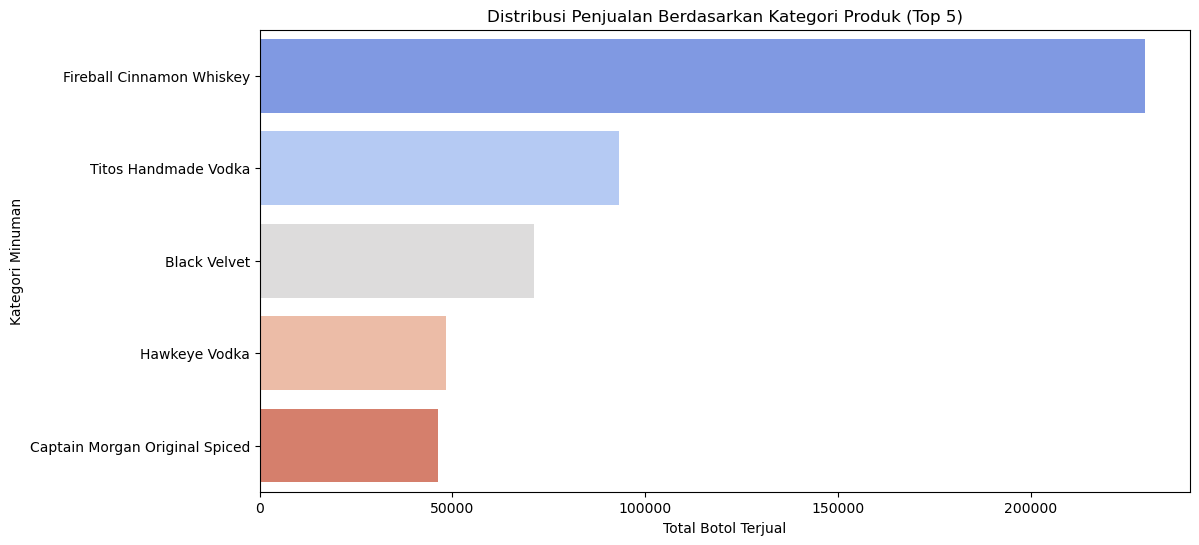

In [ ]:
# Membuat Group
df_grouped = df.groupby("item_description")["bottles_sold"].sum().reset_index()
df_grouped = df_grouped.sort_values(by="bottles_sold", ascending=False).head(5)

# Menampilkan Bar Chart untuk menunjukan produk minuman yang paling diminati
plt.figure(figsize=(12,6))
sns.barplot(y=df_grouped["item_description"], x=df_grouped["bottles_sold"], palette="coolwarm")
plt.title("Distribusi Penjualan Berdasarkan Kategori Produk (Top 5)")
plt.xlabel("Total Botol Terjual")
plt.ylabel("Kategori Minuman")
plt.show()

In [14]:
# Group brand
df_grouped = df.groupby("item_description")["bottles_sold"].sum().reset_index()

# Memilih 5 produk yang paling diminati untuk dilakukan perbandingan
top_brands = df_grouped.nlargest(5, "bottles_sold")["item_description"]
df_filtered = df[df["item_description"].isin(top_brands)]

# Uji ANOVA
anova_result = stats.f_oneway(
    *[df_filtered[df_filtered["item_description"] == brand]["bottles_sold"] for brand in top_brands]
)

print("ANOVA Result:", anova_result)

# Melakukan pengecekan apakah nilai p-value lebih kecil dari 0.05
if anova_result.pvalue < 0.05:
    print("Brand mempengaruhi penjualan (p-value < 0.05)")
else:
    print("Brand tidak mempengaruhi penjualan (p-value >= 0.05)")
    
df_ano = anova_result
df_ano

ANOVA Result: F_onewayResult(statistic=96.90600961411523, pvalue=7.742200223220002e-82)
Brand mempengaruhi penjualan (p-value < 0.05)


F_onewayResult(statistic=96.90600961411523, pvalue=7.742200223220002e-82)

Brand minuman yang menempati penjualan teratas pada bulan Januari 2022 adalah Fireball Cinnamon Whiskey

Hasil dari Uji ANOVA menunjukan p-value kurang dari 0.05, hal ini menandakan Brand mempengaruhi penjualan

2. Apa saja produk minuman terlaris pada bulan Januari 2022?


In [4]:
# Membuat Group item_description dan sum bottles_sold
top_products = df.groupby("item_description")["bottles_sold"].sum().reset_index()

# Melakukan Sorting produk berdasarkan bottles_sold secara descending
top_products = top_products.sort_values(by="bottles_sold", ascending=False)

# Menampilkan 5 produk terlaris
top_5_products = top_products.head(5)
print(top_5_products)

                    item_description  bottles_sold
782        Fireball Cinnamon Whiskey        229679
2002            Titos Handmade Vodka         93065
247                     Black Velvet         71034
923                    Hawkeye Vodka         48436
399   Captain Morgan Original Spiced         46128


5 Produk minumn terlaris dibulan Januari adalah Fireball Cinnamon Whiskey, Titos Handmade Vodka, Black Velvet, Hawkeye Vodka, dan Captain Morgan Original Spiced.

3. Kapan penjualan minuman mencapai puncaknya selama bulan Januari 2022, dan bagaimana retailer dapat menyesuaikan promosi yang sesuai?

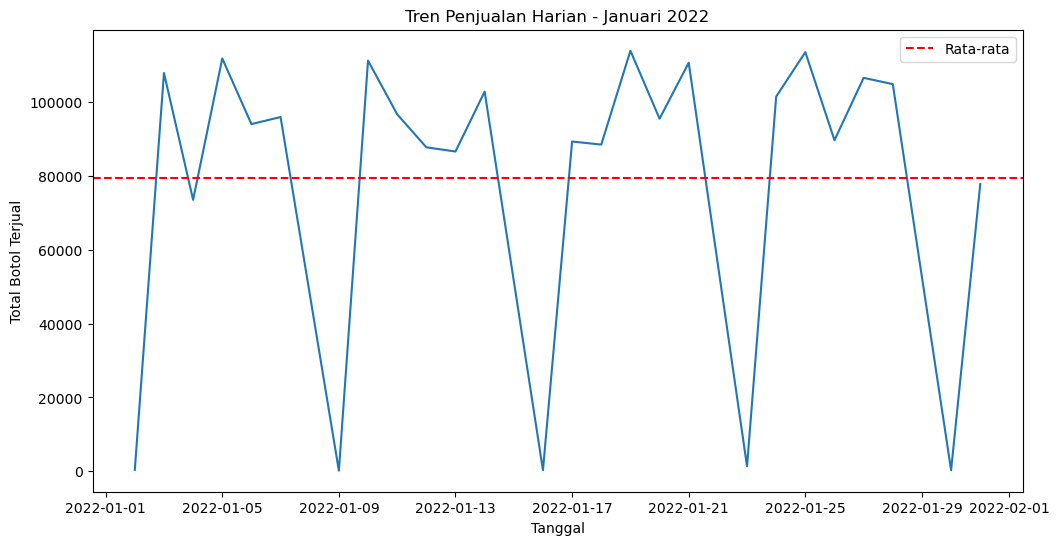

In [ ]:
# Mengubah kolom date menjadi format datetime 
df["date"] = pd.to_datetime(df["date"])

# Membuat Group date dan sum sales
daily_sales = df.groupby("date")["bottles_sold"].sum()

# Membuat Plot
plt.figure(figsize=(12,6))
sns.lineplot(x=daily_sales.index, y=daily_sales.values)
plt.axhline(y=daily_sales.mean(), color="r", linestyle="--", label="Rata-rata")
plt.title("Tren Penjualan Harian - Januari 2022")
plt.xlabel("Tanggal")
plt.ylabel("Total Botol Terjual")
plt.legend()
plt.show()

In [174]:
# Menentukan hari penjualan terbanyak
peak_sales_day = daily_sales.idxmax()
peak_sales_value = daily_sales.max()

print(f"Peak sales day: {peak_sales_day}")
print(f"Number of bottles sold on peak day: {peak_sales_value}")

Peak sales day: 2022-01-19 00:00:00
Number of bottles sold on peak day: 113926


Puncak penjualan terjadi pada tanggal 19 Januari 2022, para tanggal tersebut sebanyak 113.926 botol terjual. 

Retailer dapat mempertimbangkan untuk menjalankan promosi atau diskon khusus sekitar hari Rabu, untuk memanfaatkan volume penjualan yang tinggi.

Retailer juga dapat menganalisis faktor-faktor yang mempengaruhi penjualan pada tanggal tersebut dan meniru kondisi serupa pada tanggal-tanggal lain untuk meningkatkan penjualan.

4. Di mana lokasi penjualan tertinggi dan terendah?

In [ ]:
# Membuat Group store dan sum total sales
store_sales = df.groupby("store_name")["bottles_sold"].sum().reset_index()

# Cari toko dengan penjualan tertinggi dan terendah
top_store = store_sales.loc[store_sales["bottles_sold"].idxmax()]
bottom_store = store_sales.loc[store_sales["bottles_sold"].idxmin()]

# Output hasil
print(f"Toko dengan penjualan tertinggi: {top_store['store_name']} ({top_store['bottles_sold']} botol terjual)")
print(f"Toko dengan penjualan terendah: {bottom_store['store_name']} ({bottom_store['bottles_sold']} botol terjual)")


Toko dengan penjualan tertinggi: Hy-Vee #3 / BDI / Des Moines (55847 botol terjual)
Toko dengan penjualan terendah: Big 10 Mart #12 / Dubuque (1 botol terjual)


In [ ]:
# Group lokasi toko
df_grouped = df.groupby("store_name")["bottles_sold"].sum().reset_index()

# 5 Penjualan terbanyak
top_stores = df_grouped.nlargest(5, "bottles_sold")["store_name"]
df_filtered = df[df["store_name"].isin(top_stores)]

# Uji Kruskal-Wallis
hasil_kruskal = stats.kruskal(
    *[df_filtered[df_filtered["store_name"] == store]["bottles_sold"] for store in top_stores]
)

print("Kruskal-Wallis Test Result:", hasil_kruskal)

if hasil_kruskal.pvalue < 0.05:
    print("Lokasi mempengaruhi penjualan (p-value < 0.05)")
else:
    print("Lokasi tidak mempengaruhi penjualan (p-value >= 0.05)")

Kruskal-Wallis Test Result: KruskalResult(statistic=407.07645281284766, pvalue=8.22708342284854e-87)
Lokasi mempengaruhi penjualan (p-value < 0.05)


Toko dengan penjualan terbanyak adalah Hy-Vee #3, sedangkan toko dengan penjualan terendah adalah B1ig 10 Mart #12. Berdasarkan dari hasil uji Kruskal-Wallis lokasi dapat mempengaruhi tingkat penjualan. Penjualan yang rendah mungkin saja dapat disebabkan karena lokasi toko yang jauh dari pemukiman warga.

5. Mengapa kategori minuman tertentu lebih laku daripada yang lain?

C:\Users\eldim\AppData\Local\Temp\ipykernel_6464\1443960331.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df_grouped["category_name"], x=df_grouped["bottles_sold"], palette="coolwarm")


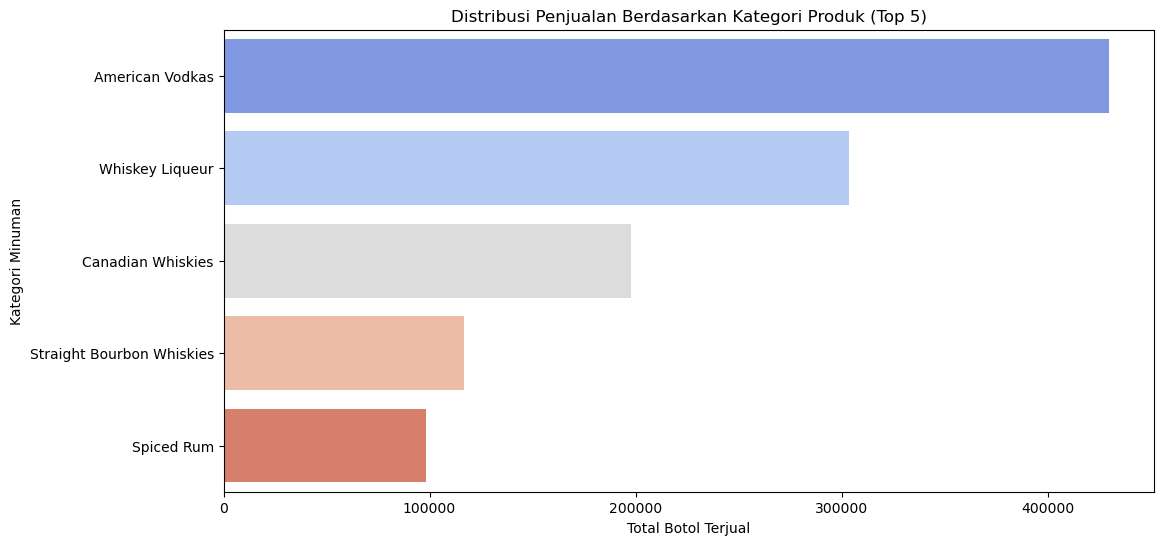

In [151]:
df_grouped = df.groupby("category_name")["bottles_sold"].sum().reset_index()
df_grouped = df_grouped.sort_values(by="bottles_sold", ascending=False).head(5)

plt.figure(figsize=(12,6))
sns.barplot(y=df_grouped["category_name"], x=df_grouped["bottles_sold"], palette="coolwarm")
plt.title("Distribusi Penjualan Berdasarkan Kategori Produk (Top 5)")
plt.xlabel("Total Botol Terjual")
plt.ylabel("Kategori Minuman")
plt.show()

In [ ]:
# Membuat Group category_name dan sum bottles_sold
category_sales = df.groupby("category_name")["bottles_sold"].sum().reset_index()

# Uji Kruskal-Wallis H
hasil_kruskal = stats.kruskal(
    *[df[df["category_name"] == category]["bottles_sold"] for category in category_sales["category_name"]]
)

print("Kruskal-Wallis H-test:", hasil_kruskal)

# Melakukan pengecekan p-value <0.05
if hasil_kruskal.pvalue < 0.05:
    print("Kategori minuman mempengaruhi penjualan (p-value < 0.05)")
else:
    print("Kategori minuman tidak mempengaruhi penjualan (p-value >= 0.05)")

Kruskal-Wallis H-test Result: KruskalResult(statistic=13926.518096089236, pvalue=0.0)
Kategori minuman mempengaruhi penjualan (p-value < 0.05)


In [13]:
# Mengecek correlation antara price per bottle dan bottles sold
correlation = df["state_bottle_retail"].corr(df["bottles_sold"])

print("Correlation antara price dan sales:", correlation)

if correlation > 0:
    print("Positive correlation (>0): Harga yang lebih tinggi meningkatkan penjualan (umumnya merek premium)")
elif correlation < 0:
    print("Negative correlation (<0): Harga yang lebih tinggi mengurangi penjualan (produk yang sensitif terhadap harga)")
else: 
    print("Near 0: Hubungan yang lemah antara harga dan penjualan")

Correlation antara price dan sales: -0.06320072747054763
Negative correlation (<0): Harga yang lebih tinggi mengurangi penjualan (produk yang sensitif terhadap harga)


In [ ]:
# Filter untuk American Vodkas
american_vodkas = df[df['category_name'] == 'American Vodkas']

# Rata-rata price per bottle volume
average_price_per_volume = american_vodkas.groupby('bottle_volume_ml')['state_bottle_retail'].mean().reset_index()

# Rename kolom
average_price_per_volume.columns = ['bottle_volume_ml', 'average_price']

df_avg = average_price_per_volume
df_avg

,bottle_volume_ml,average_price
0,50,8.955079
1,100,1.462206
2,200,2.950024
3,375,4.527874
4,750,9.216132
5,1000,11.349932
6,1750,14.984921


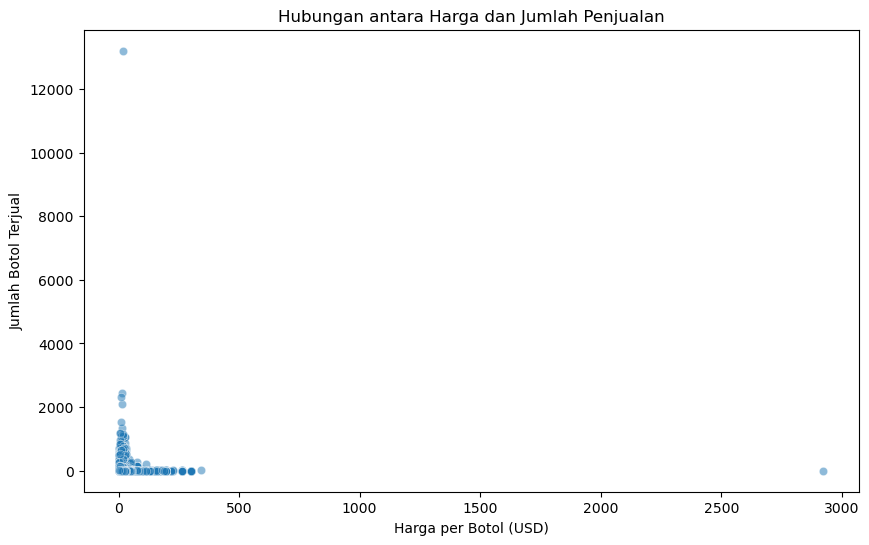

In [5]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df["state_bottle_retail"], y=df["bottles_sold"], alpha=0.5)
plt.title("Hubungan antara Harga dan Jumlah Penjualan")
plt.xlabel("Harga per Botol (USD)")
plt.ylabel("Jumlah Botol Terjual")
plt.show()


American Vodkas menjadi kategori produk yang terlaris dibulan Januari 2022. Hal ini diduga disebabkan karena kategori produk yang berharga tinggi dapat mempengaruhi penjualan. Harga American Vodkas dengan volume 750ml memiliki harga rata-rata sebesar $9.21 USD dan untuk volume 1750ml dihargai rata-rata sebesar $14.98 USD. Dilihat berdasarkan value dari produk, botol dengan volume 750ml lebih menguntungkan konsumen jika dibandingkan dengan volume 50ml yang memiliki harga rata-rata $8.95 USD.

6. Bagaimana retailer dapat menggunakan data penjualan untuk mengoptimalkan strategi penetapan harga dan memaksimalkan pendapatan?

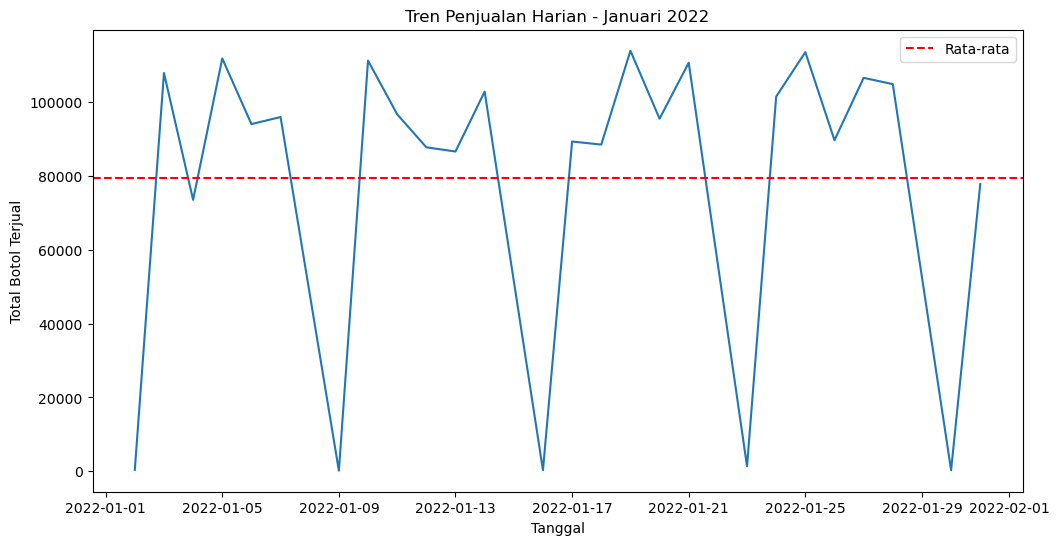

In [ ]:
# Membuat Group date dan sum sales
daily_sales = df.groupby("date")["bottles_sold"].sum()

# Membuat Plot
plt.figure(figsize=(12,6))
sns.lineplot(x=daily_sales.index, y=daily_sales.values)
plt.axhline(y=daily_sales.mean(), color="r", linestyle="--", label="Rata-rata")
plt.title("Tren Penjualan Harian - Januari 2022")
plt.xlabel("Tanggal")
plt.ylabel("Total Botol Terjual")
plt.legend()
plt.show()

Berdasarkan dari data penjualan harian. Jika penjualan meningkat pada akhir pekan atau hari tertentu, retailer bisa menerapkan harga premium saat permintaan tinggi.

### Kesimpulan

Berdasarkan analisis data penjualan minuman alkohol di Iowa selama Januari 2022, ditemukan bahwa produk terlaris dan toko dengan penjualan tertinggi memiliki pola konsumsi yang dapat dimanfaatkan untuk strategi bisnis. Retailer perlu memprioritaskan stok pada produk dengan permintaan tinggi serta memastikan distribusi yang optimal ke toko dengan volume penjualan besar. Selain itu, tren penjualan menunjukkan adanya puncak pada waktu tertentu, sehingga retailer dapat menyesuaikan strategi promosi dengan memberikan diskon atau penawaran khusus saat permintaan rendah. Dengan menerapkan strategi ini, retailer dapat meningkatkan efisiensi operasional, mengoptimalkan penjualan, dan memaksimalkan profitabilitas secara berbasis data.